In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# --- Data Cleaning and Preprocessing ---
# Drop unnecessary columns
# The 'Unnamed: 32' column is empty, and 'id' is not a predictive feature.
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [3]:
# Encode the target variable 'diagnosis'
# We will map 'M' (Malignant) to 1 and 'B' (Benign) to 0.
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the first 5 rows to verify changes
print("Processed Data Head:")
print(df.head())

Processed Data Head:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...   

In [4]:
# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Feature Scaling ---
# It's important to scale data for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [6]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# --- Model Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Evaluation Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1-Score: 0.96


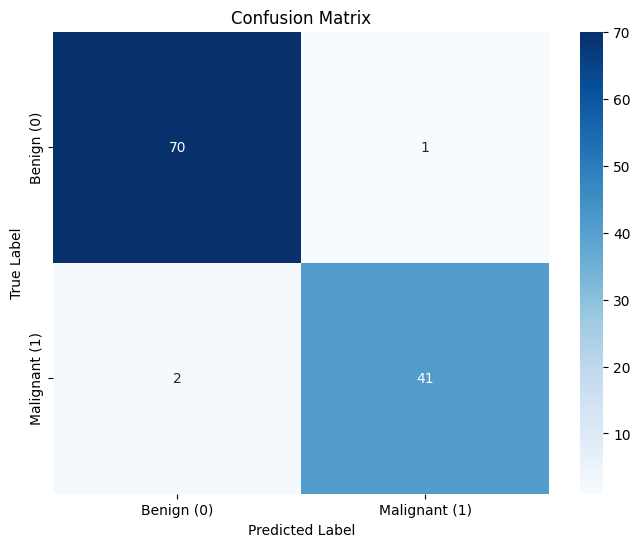

In [7]:
# --- Confusion Matrix ---
# A confusion matrix gives a detailed breakdown of correct and incorrect predictions.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()